In [4]:
import pandas as pd
df = pd.read_csv('/content/Facebook_Marketplace_data.csv')
correlations = df[['num_reactions', 'num_comments', 'num_shares']].corr()
print("Correlation Matrix:")
print(correlations)



Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


In [5]:
print("\nInterpretation:")
for col1 in correlations.columns:
    for col2 in correlations.columns:
        if col1 != col2:
            corr = correlations.loc[col1, col2]
            if corr > 0:
                strength = "strong" if abs(corr) > 0.7 else "moderate"
                direction = "positive"
            elif corr < 0:
                strength = "strong" if abs(corr) > 0.7 else "moderate"
                direction = "negative"
            else:
                strength = "no"
                direction = "linear relationship"

            print(f"The correlation between '{col1}' and '{col2}' is {direction} with a {strength} strength (correlation coefficient: {corr})")


Interpretation:
The correlation between 'num_reactions' and 'num_comments' is positive with a moderate strength (correlation coefficient: 0.15084290344217685)
The correlation between 'num_reactions' and 'num_shares' is positive with a moderate strength (correlation coefficient: 0.25072251662831907)
The correlation between 'num_comments' and 'num_reactions' is positive with a moderate strength (correlation coefficient: 0.15084290344217685)
The correlation between 'num_comments' and 'num_shares' is positive with a moderate strength (correlation coefficient: 0.6406374068011963)
The correlation between 'num_shares' and 'num_reactions' is positive with a moderate strength (correlation coefficient: 0.25072251662831907)
The correlation between 'num_shares' and 'num_comments' is positive with a moderate strength (correlation coefficient: 0.6406374068011963)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

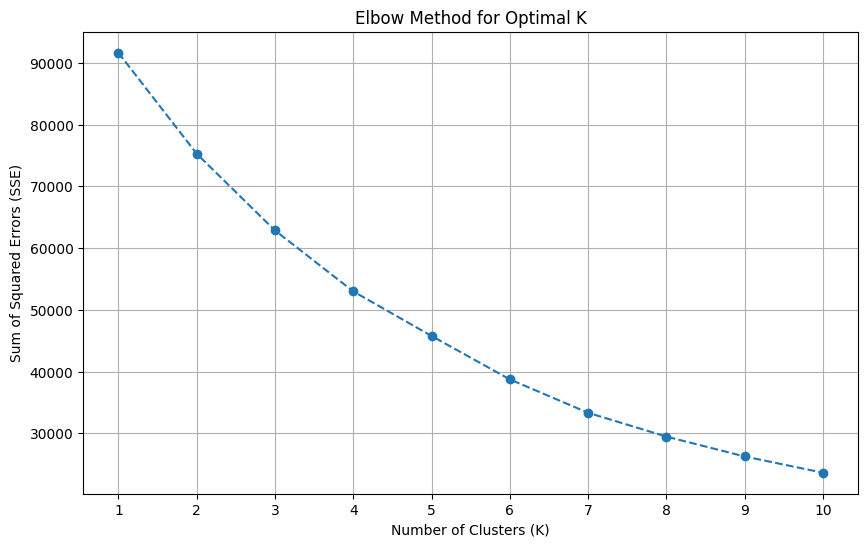

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select relevant columns
selected_columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
                    'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_selected = df[selected_columns]

# Convert categorical column 'status_type' to numerical using one-hot encoding
df_selected = pd.get_dummies(df_selected, columns=['status_type'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Initialize list to store SSE (Sum of Squared Errors) for each K
sse = []

# Fit KMeans clustering for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



In [13]:

# Count the different types of posts
post_counts = df['status_type'].value_counts()

# Print the count of different types of posts
print("Count of different types of posts:")
print(post_counts)


Count of different types of posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [14]:
# Group the data by 'status_type' and calculate the average values
average_values = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

# Print the average values for each post type
print("Average values of num_reactions, num_comments, num_shares for each post type:")
print(average_values)


Average values of num_reactions, num_comments, num_shares for each post type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
